## Alpha Vantage and Pandas Project

In [8]:
# Variable Definitions 

your_name=" MikePando"  # put your name here

api_key=""  # put your API key here

company_name="NVIDIA"    # put the name of the company whose stock you are going to plot

stock_symbol="NVDA"         # put the stock symbol you want to look up
                            # for example Amazon is AMZN, Microsoft is MSFT

url="https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol="+stock_symbol
url=url+"&interval=5min&datatype=csv&apikey="+api_key   # you do NOT need to change this

project_filename="av_project.html"   # filename to be used for HTML file, you do NOT need to change this

# run this cell

In [9]:
# We are going to be generating an HTML page containing hourly plots of closing prices
# The name of the HTML file is stored in the project_filename variable (defined above)

def startWebPage(project_filename,company_name,your_name):
    handle=open(project_filename,"w")

    # Now we will write out the first few line of HTML for a web page to the file
    handle.write("<!DOCTYPE html><html>\n")
    handle.write("<head><title>Final Project</title></head>\n")
    handle.write("<body>\n")
    handle.write("<center>\n")
    handle.write("<h2>"+company_name+":Intra-Day Closing Values</h2>\n")
    # the following img tag will show a stock-related image on our web page - feel free to replace the URL if you wish
    handle.write("<img src='https://www.kiplinger.com/slideshow/investing/T052-S001-10-small-cap-growth-stocks-to-buy-now/images/intro.jpg' height=180, width=800>\n")
    handle.write("<h3>By"+your_name+"</h3>\n")
    handle.write("</center>\n")

    return handle

In [3]:
import pandas as pd     # pd will be an alias for pandas

In [10]:
# Read the CSV file returned by the given URL - this returns a Pandas dataframe

data=pd.read_csv(url)

In [11]:
# Lets save our data in a csv file using the dataframe to_csv method

data.to_csv("stock_project.csv")

In [12]:
# Convert the timestamp from string to Pandas datetime type

data.timestamp=pd.to_datetime(data.timestamp)

In [13]:
# Place the hour in its own column
data["hour"]=data.timestamp.dt.hour

In [14]:
# Extract the minute from each timestamp, it should be stored in its own column named "minute" 

data["minute"]=data.timestamp.dt.minute

In [17]:
minDate=data.timestamp.min()
maxDate=data.timestamp.max()
if minDate.day!=maxDate.day:
    daysList=[minDate,maxDate]    # two days in time series
else:
    daysList=[minDate]    # only one day in the time series

print(daysList)

[Timestamp('2019-04-29 14:15:00'), Timestamp('2019-04-30 16:00:00')]


In [18]:
# In order to see the plots within a jupyter notebook

%matplotlib inline

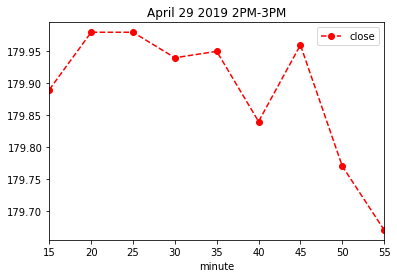

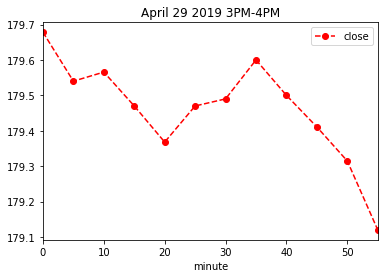

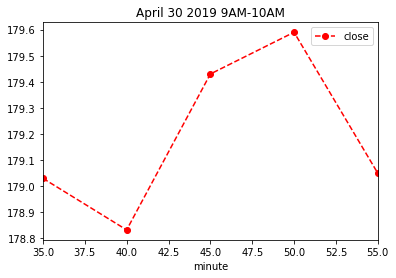

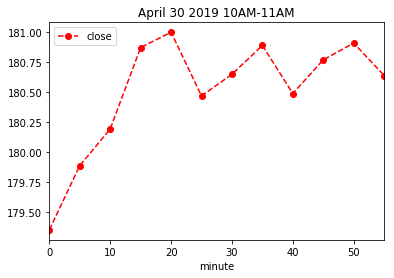

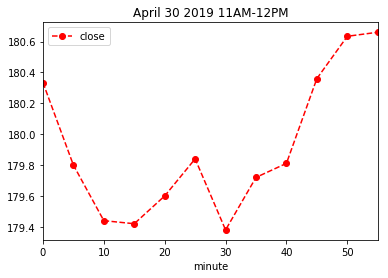

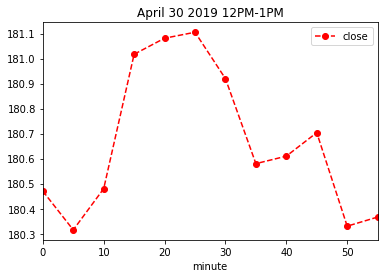

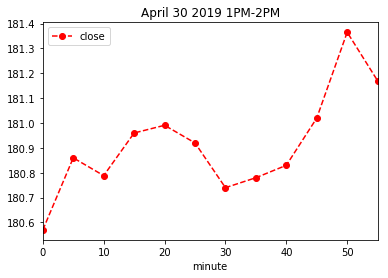

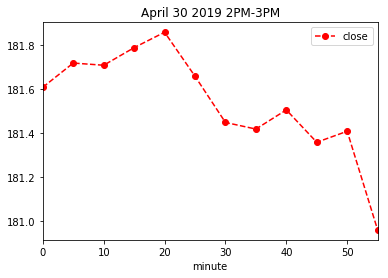

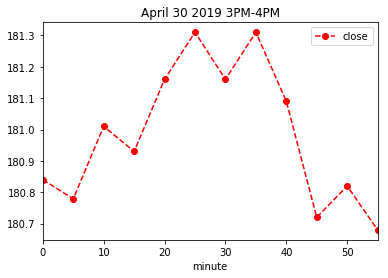

In [19]:
handle=startWebPage(project_filename,company_name,your_name)
for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    for j in range(startHour,endHour):
        oneHourData=oneDayData[oneDayData.hour==j]
        minute=oneHourData.minute
        close=oneHourData.close
        plotData=oneHourData[["minute","close"]]
        plotData=plotData.set_index("minute")
        plotData=plotData.sort_index()
        if j<11:
            leftLabel=str(j)+"AM"
            rightLabel=str(j+1)+"AM"
        elif j==11:
            leftLabel="11AM"
            rightLabel="12PM"
        elif j==12:
            leftLabel="12PM"
            rightLabel="1PM"
        else:
            leftLabel=str(j-12)+"PM"
            rightLabel=str(j+1-12)+"PM"  
        plotTitle=str(i.month_name())+" "+str(i.day)+" "+str(i.year)+" "+leftLabel+"-"+rightLabel
        figureFileName="plot_"+str(i.day)+"_"+str(j)+".png"
        plotData.plot(color="red",linestyle="dashed",marker="o", title=plotTitle).get_figure().savefig(figureFileName)
        handle.write("<img src='"+figureFileName+"'><br>\n")
handle.write("</body></html>")
handle.close()